In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## XY placement uncertainty template

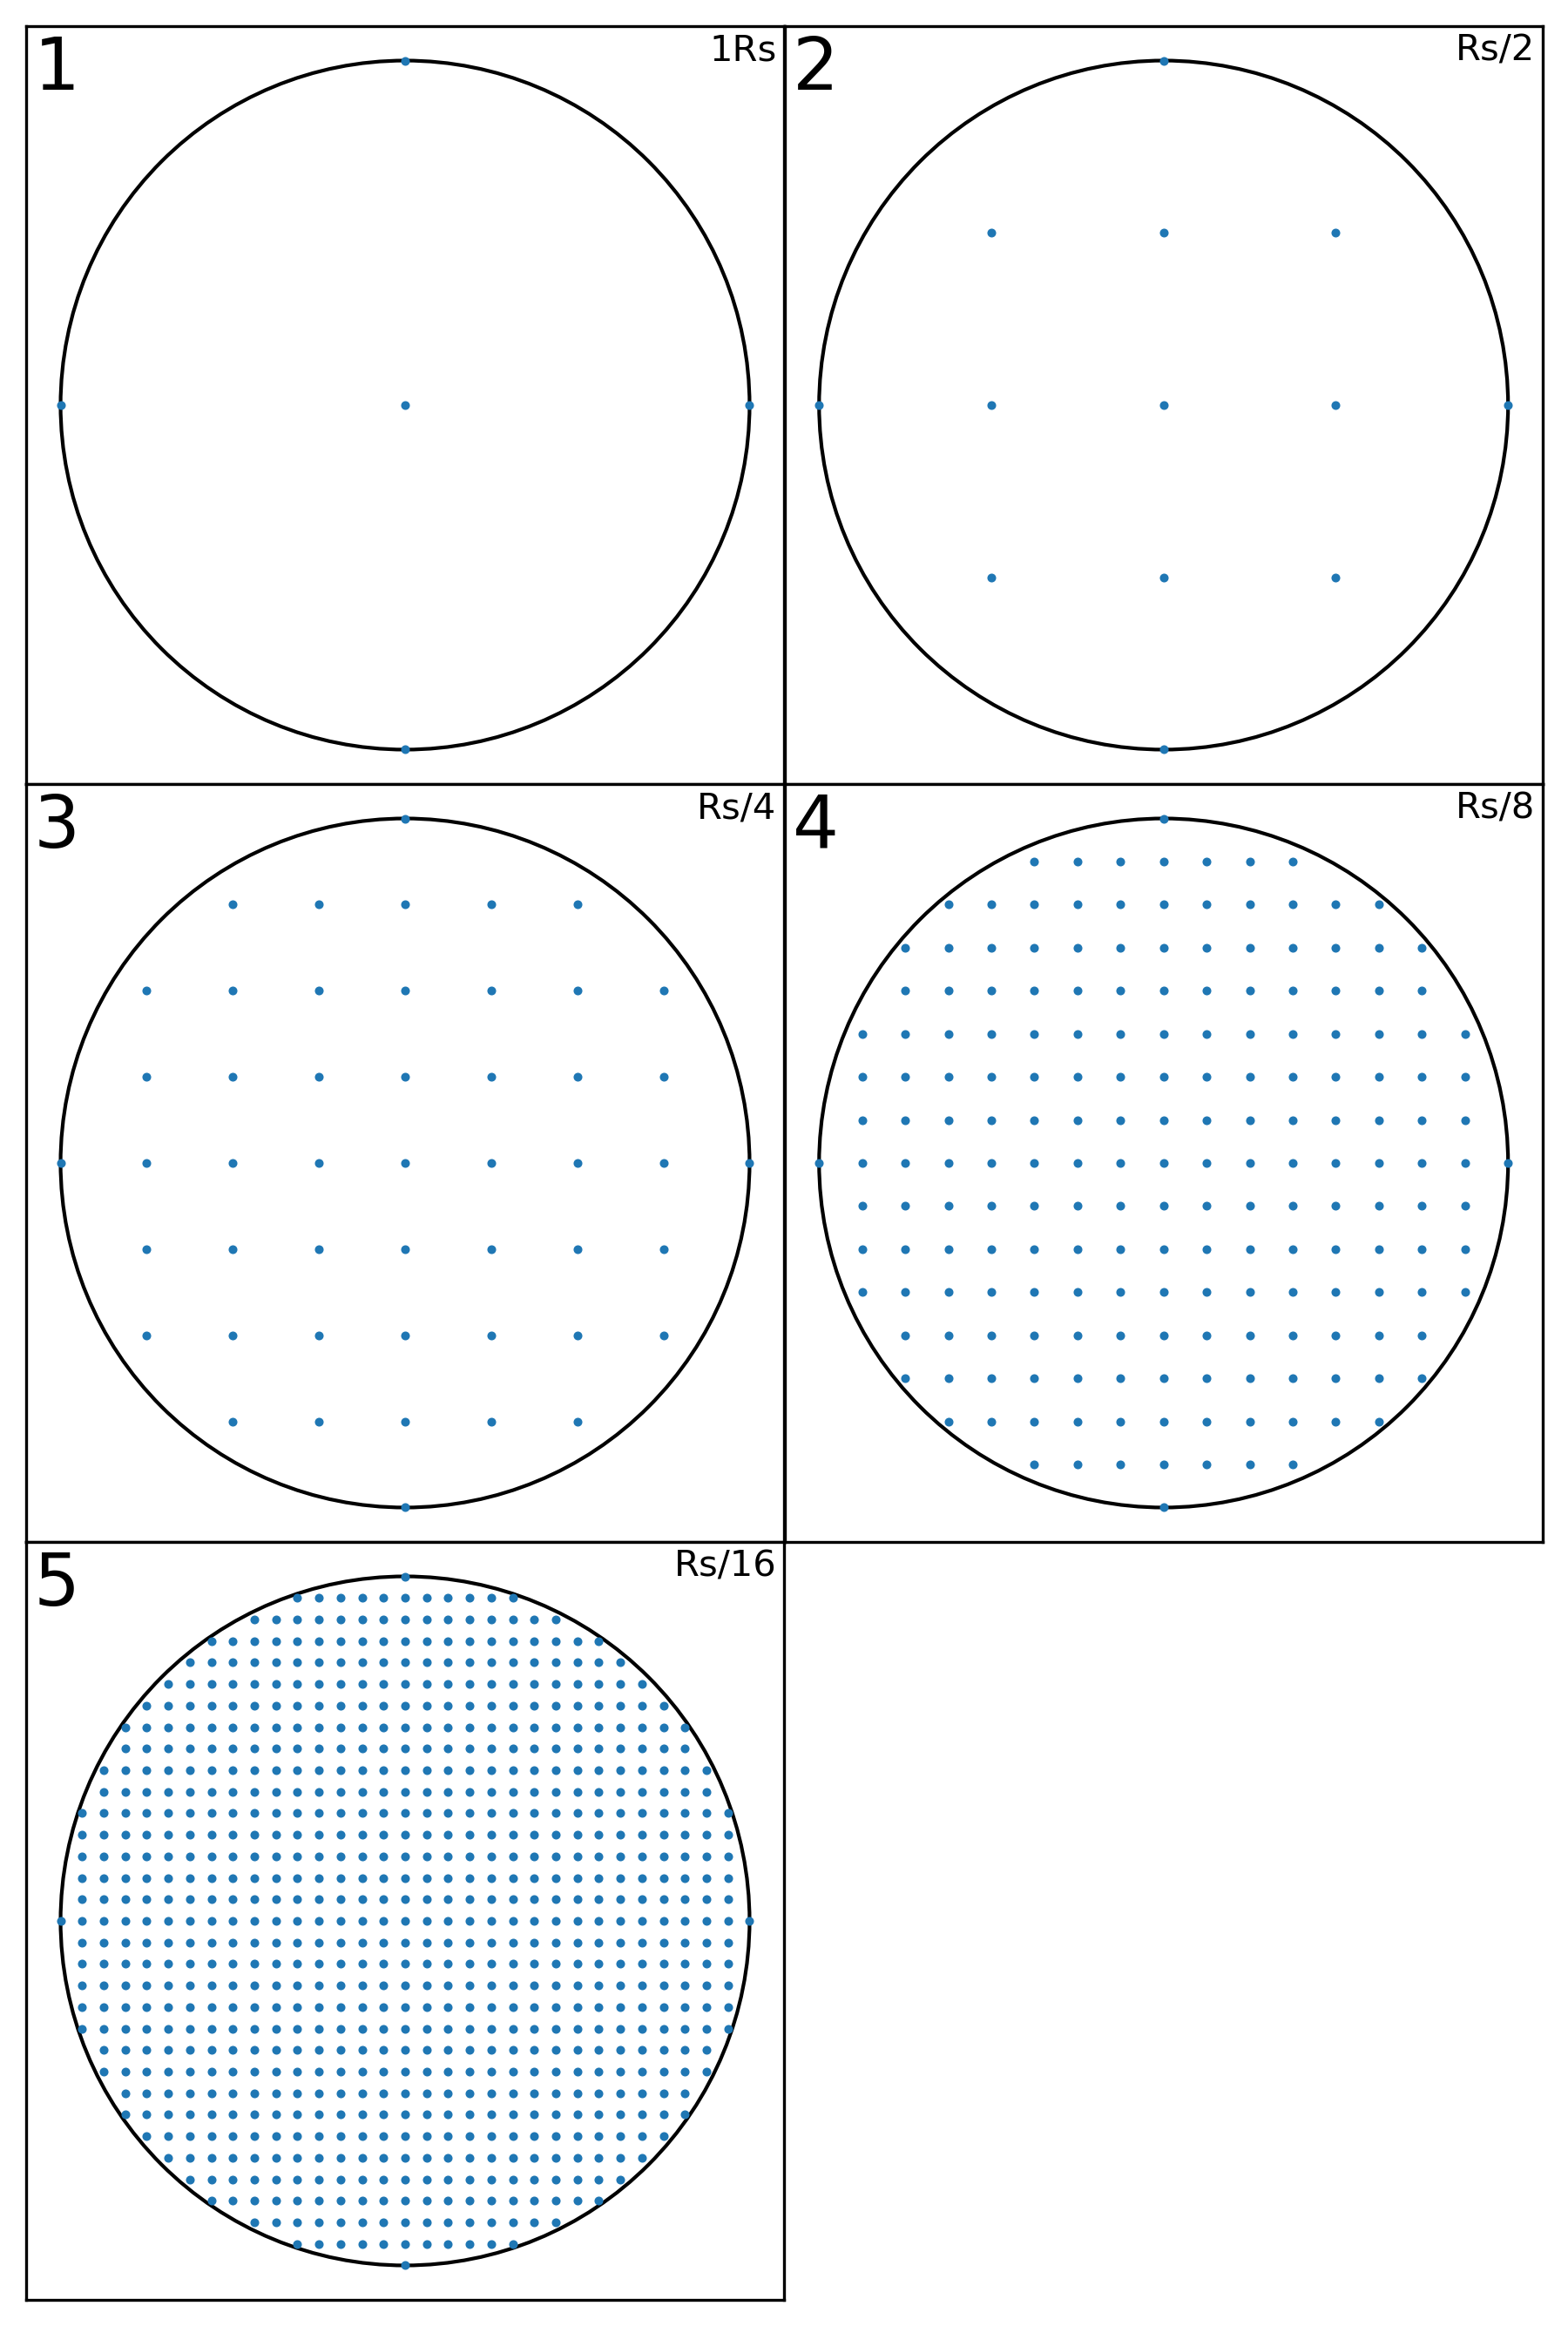

In [57]:
n_rows = 3
n_columns = 2

fig = plt.figure(layout='tight', figsize=np.array([n_columns*1.0175, n_rows])*3, dpi=300)
gs0 = gridspec.GridSpec(n_rows, n_columns, figure=fig, wspace=0, hspace=0)

for i in range(n_rows):
    for j in range(n_columns):
        n = j+i*n_columns

        if n < 5:
            delta = 1/2**n
            grid = np.arange(-1,1+delta,delta)
            gridx, gridy = np.meshgrid(grid,grid)

            ax = fig.add_subplot(gs0[i,j])

            circle1 = plt.Circle((0, 0), 1, edgecolor='k', facecolor='None')
            ax.add_patch(circle1)

            r = np.sqrt(gridx*gridx + gridy*gridy)
            ax.scatter(gridx[r<=1], gridy[r<=1], s=2)


            ax.set_ylim(-1.1,1.1)
            ax.set_xlim(-1.1,1.1)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_aspect('equal')
            ax.annotate(
                f"{n+1}", xy=(0.01, 0.99), xycoords="axes fraction", fontsize=20, va="top", ha="left"
            )
            if n==0:
                ax.annotate(
                    f"1Rs", xy=(0.99, 0.99), xycoords="axes fraction", fontsize=10, va="top", ha="right"
                )
            else:
                ax.annotate(
                    f"Rs/{2**(n)}", xy=(0.99, 0.99), xycoords="axes fraction", fontsize=10, va="top", ha="right"
                )                       

## Orientation placement uncertainty template

[ 0.75  1.25 -0.25  0.25  0.75  0.25 -0.25 -0.75]
[ 0.875  1.125 -0.125  0.125  0.625  0.375 -0.375 -0.625]
[ 0.9375  1.0625 -0.0625  0.0625  0.5625  0.4375 -0.4375 -0.5625]
[ 0.96875  1.03125 -0.03125  0.03125  0.53125  0.46875 -0.46875 -0.53125]
[ 0.984375  1.015625 -0.015625  0.015625  0.515625  0.484375 -0.484375
 -0.515625]
[ 0.9921875  1.0078125 -0.0078125  0.0078125  0.5078125  0.4921875
 -0.4921875 -0.5078125]


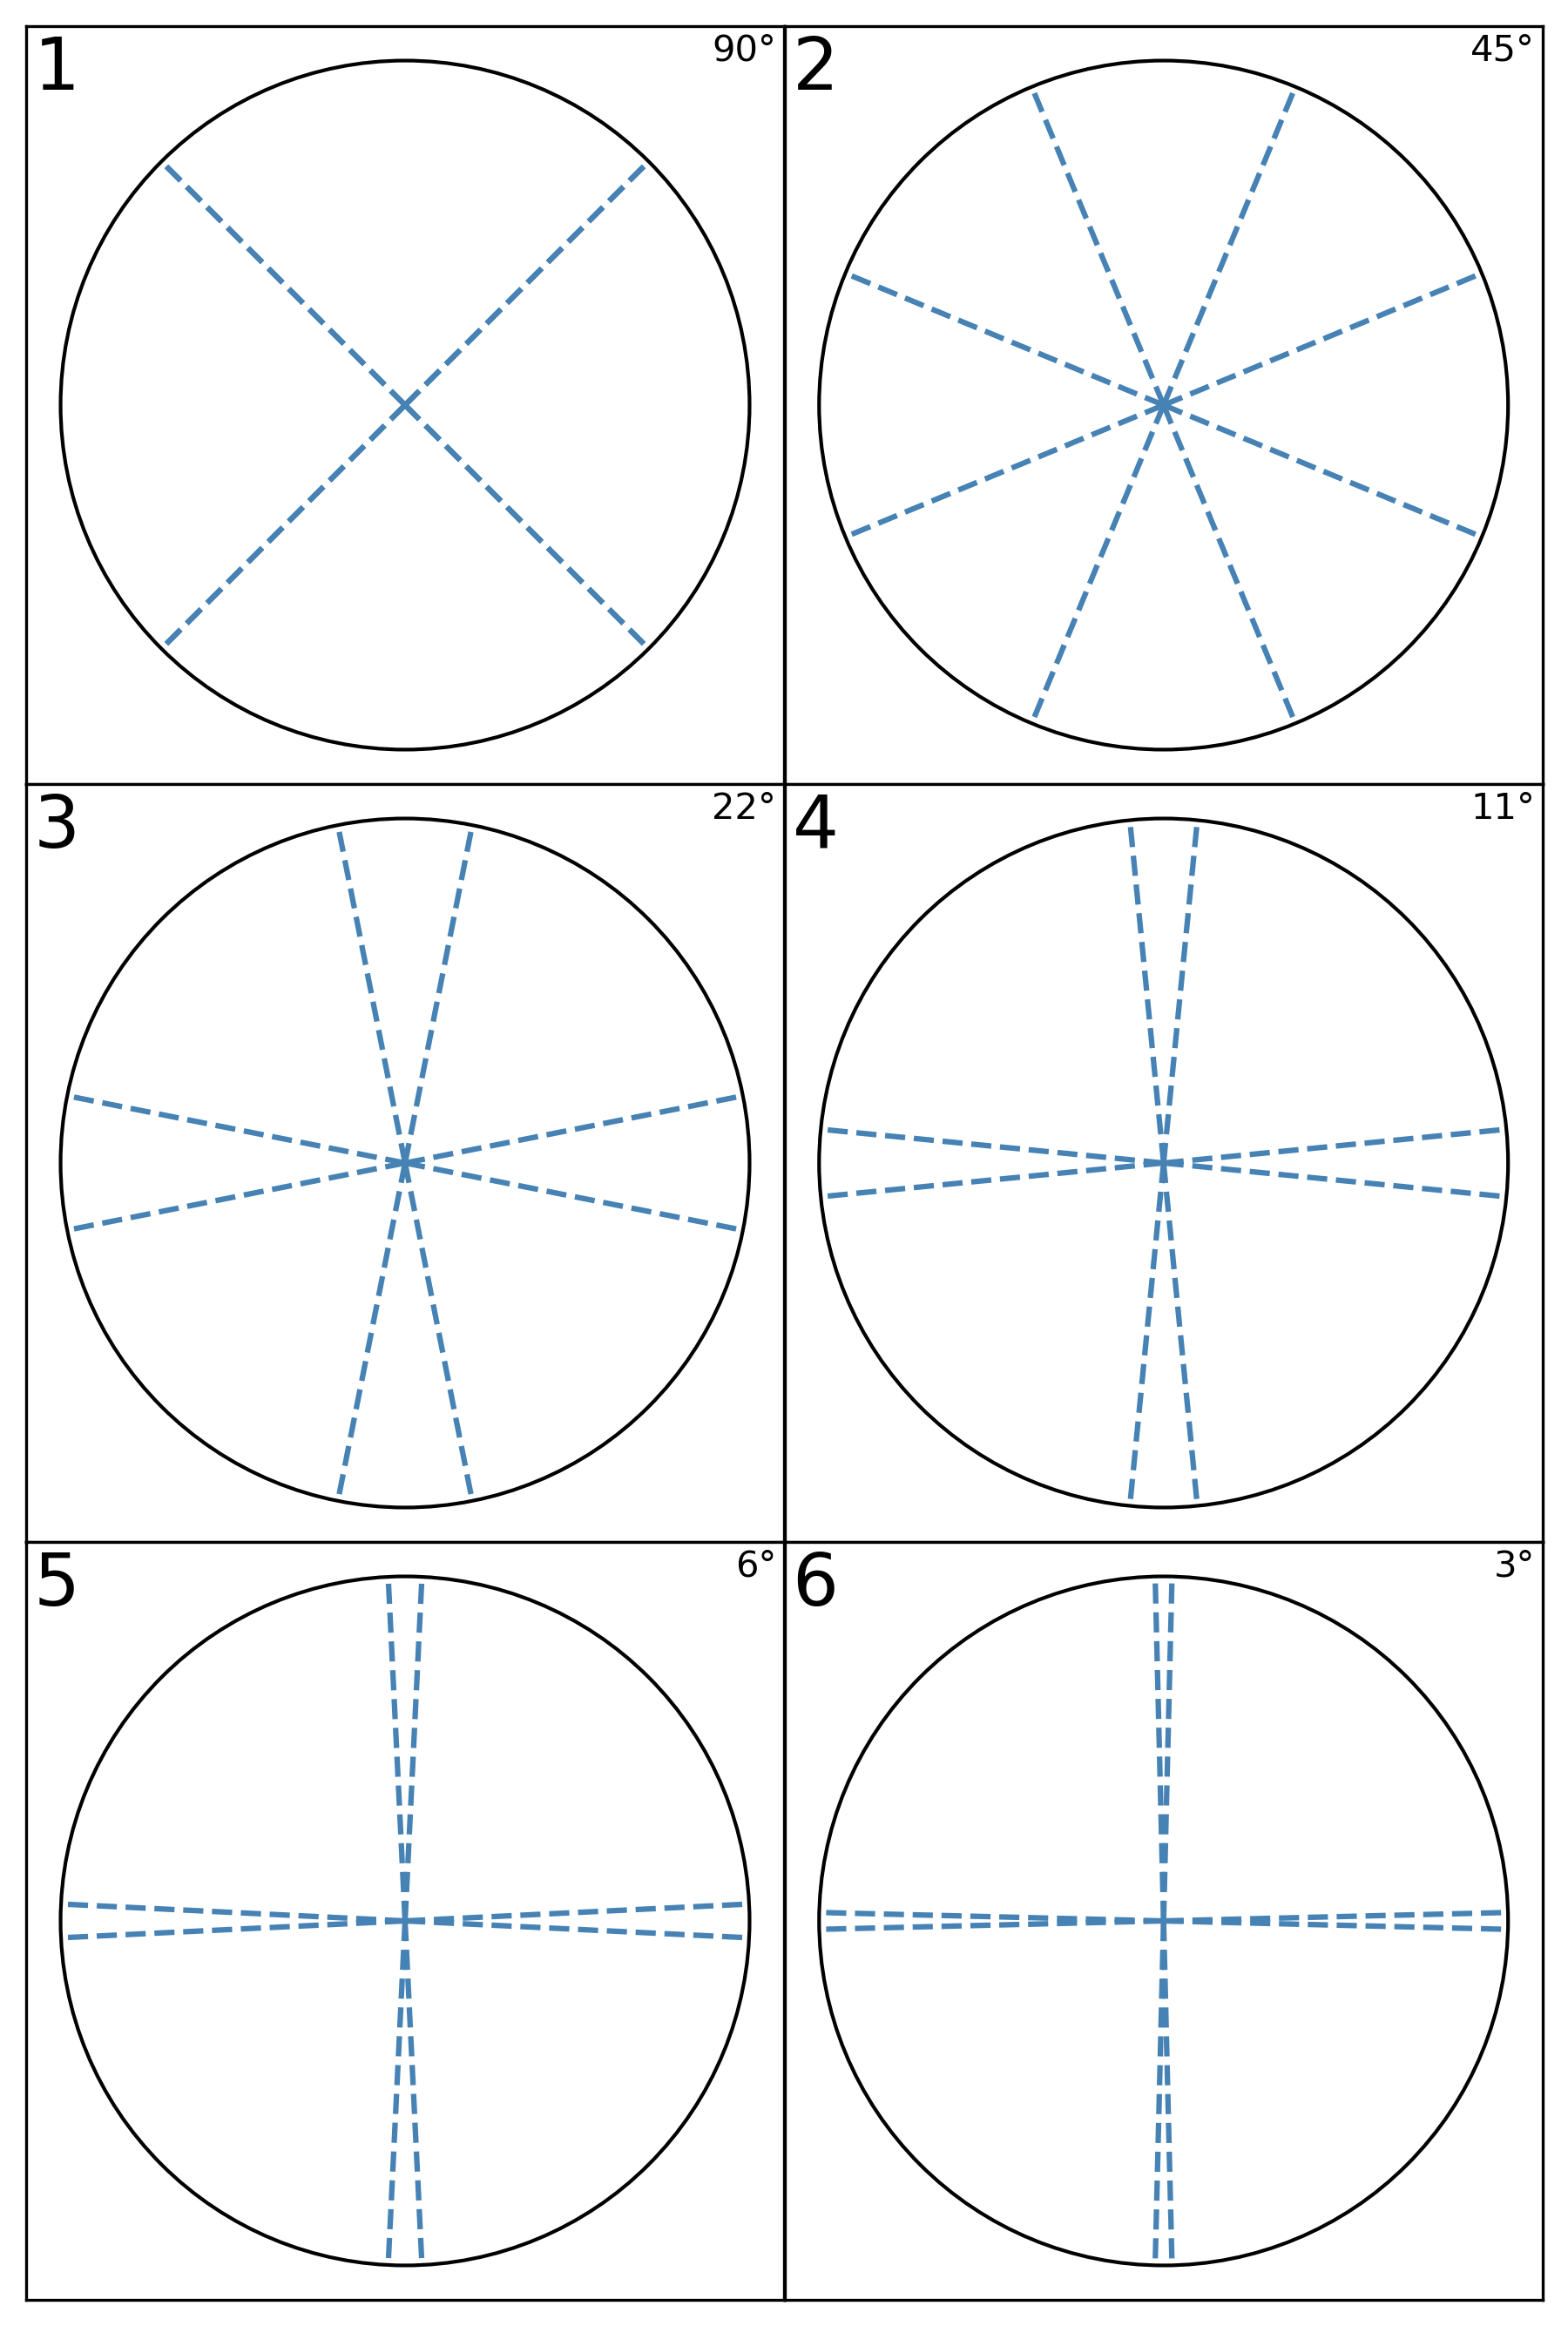

In [46]:
n_rows = 3
n_columns = 2

fig = plt.figure(layout='tight', figsize=np.array([n_columns*1.0175, n_rows])*3, dpi=300)
gs0 = gridspec.GridSpec(n_rows, n_columns, figure=fig, wspace=0, hspace=0)

for i in range(n_rows):
    for j in range(n_columns):
        n = j+i*n_columns


        delta = 1/2**(n+2)            
        grid = np.array([1-delta, 1+delta, 0-delta, 0+delta, 0.5+delta, 0.5-delta, -0.5+delta, -0.5-delta])


        print(grid)
        gridx, gridy = np.meshgrid(grid,grid)

        ax = fig.add_subplot(gs0[i,j])

        circle1 = plt.Circle((0, 0), 1, edgecolor='k', facecolor='None')
        ax.add_patch(circle1)

        r = np.sqrt(gridx*gridx + gridy*gridy)
        # ax.scatter(gridx[r<=1], gridy[r<=1], s=2)

        for angle in grid*np.pi:
            ax.plot([0, np.cos(angle)], [0, np.sin(angle)], c='steelblue', ls='--')



        ax.set_ylim(-1.1,1.1)
        ax.set_xlim(-1.1,1.1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('equal')
        ax.annotate(
            f"{n+1}", xy=(0.01, 0.99), xycoords="axes fraction", fontsize=20, va="top", ha="left"
        )
        ax.annotate(
            f"{int(np.round(delta*4*90))}°", xy=(0.99, 0.99), xycoords="axes fraction", fontsize=10, va="top", ha="right"
        )

## Time measurement uncertainty template

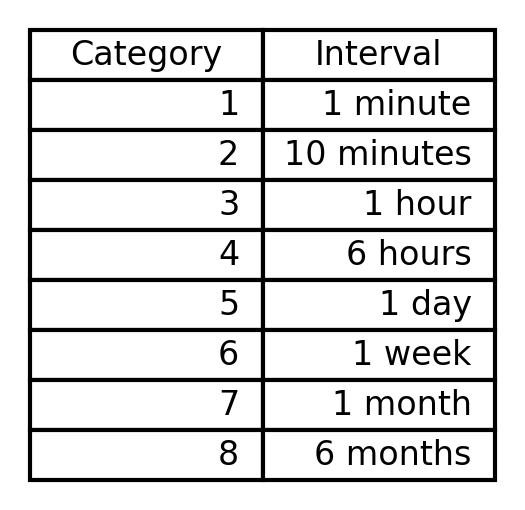

In [55]:
data = [[ '1', '1 minute',],
        [ '2', '10 minutes',],
        [ '3',  '1 hour',],
        [ '4',  '6 hours',],
        ['5', '1 day',],
        [ '6', '1 week',],
        [ '7',  '1 month',],
        [ '8',  '6 months',]]

columns = ('Category', 'Interval')

fig, ax = plt.subplots(layout='tight', figsize=np.array([2,1]), dpi=300)
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# Add a table at the bottom of the axes
the_table = ax.table(cellText=data,
                      colLabels=columns,
                      loc='center')